# MODELIZACIÓN PARA NO SUPERVISADO

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import GridSearchCV

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = '../../'

Nombres de los ficheros de datos.

In [3]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [4]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)
df

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,compra
Index_Column_Name,,,,,,,,,,,,,,,,,,,,,
0,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.70,0.44,0
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,0.00,1.00,0.00,0.10,0.30,0.17,0.70,0.44,0
2,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.04,0.68,0.13,0.60,1.00,1
3,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.02,0.14,0.07,0.50,0.67,0
4,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.04,0.63,0.07,0.70,0.78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,0.04,0.79,0.13,0.60,1.00,0
4836,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.26,0.63,0.17,0.60,0.56,1
4837,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,0.04,0.11,0.13,0.60,0.89,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4840 entries, 0 to 4839
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   origen_API                                4840 non-null   float64
 1   origen_Landing Page Submission            4840 non-null   float64
 2   origen_Lead Add Form                      4840 non-null   float64
 3   origen_OTROS                              4840 non-null   float64
 4   fuente_Chat                               4840 non-null   float64
 5   fuente_Direct Traffic                     4840 non-null   float64
 6   fuente_Google                             4840 non-null   float64
 7   fuente_OTROS                              4840 non-null   float64
 8   fuente_Organic Search                     4840 non-null   float64
 9   fuente_Reference                          4840 non-null   float64
 10  ult_actividad_Chat Conversation          

In [6]:
#Esto es un codigo que hago despues de haber experimentado varias veces, 
#Veo al final que es mejor quitar aquellas que no son predictivas, que son estas:
df.drop(columns=['origen_API',
                'origen_Landing Page Submission',
                'origen_Lead Add Form',
                'origen_OTROS',
                'fuente_Chat',
                'fuente_Direct Traffic',
                'fuente_Google',
                'fuente_OTROS',
                'fuente_Organic Search',
                'fuente_Reference'],inplace=True)

In [7]:
df.columns

Index(['ult_actividad_Chat Conversation', 'ult_actividad_Converted to Lead',
       'ult_actividad_Email Link Clicked', 'ult_actividad_Email Opened',
       'ult_actividad_OTROS', 'ult_actividad_Page Visited on Website',
       'ult_actividad_SMS Sent', 'ambito_Banking, Investment And Insurance',
       'ambito_Business Administration', 'ambito_Finance Management',
       'ambito_Human Resource Management', 'ambito_IT Projects Management',
       'ambito_International Business', 'ambito_Marketing Management',
       'ambito_Media and Advertising', 'ambito_OTROS',
       'ambito_Operations Management', 'ambito_Select',
       'ambito_Supply Chain Management', 'ambito_Travel and Tourism',
       'ocupacion_OTROS', 'ocupacion_Student', 'ocupacion_Unemployed',
       'ocupacion_Working Professional', 'descarga_lm_No', 'descarga_lm_Yes',
       'visitas_total_mms', 'tiempo_en_site_total_mms',
       'paginas_vistas_visita_mms', 'score_actividad_mms', 'score_perfil_mms',
       'compra'],
  

## MODELIZAR

### Crear el espacio de soluciones

In [8]:
# como no tengo muchos datos lo hago entre 3 y 7

min_k = 3
max_k = 7

soluciones = list(range(min_k,max_k))

### Crear listas para guardar la salida de cada métrica

In [9]:
codo = []
silueta = []
calins = []
davies = []

### Analizar el espacio de soluciones

In [10]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### Identificar la mejor solucion

#### Analizar las métricas

In [11]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
3,9295.71,0.15,896.35,2.09
4,8668.70,0.16,757.25,2.21
5,8036.78,0.18,707.51,2.13
6,7669.96,0.16,639.19,2.04


#### Analizar los gráficos

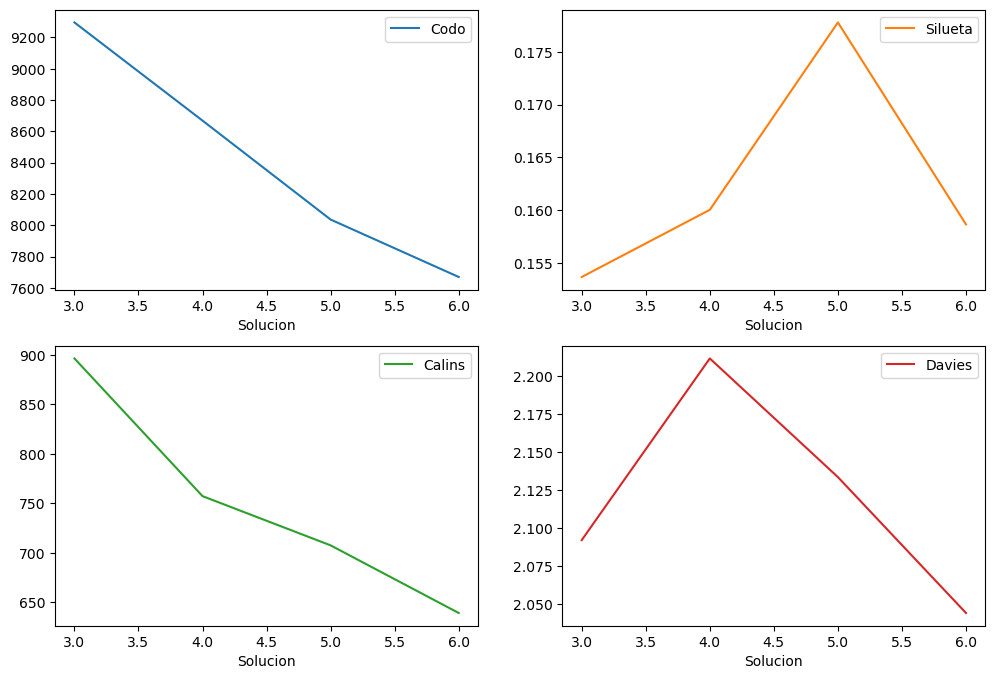

In [12]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

* Codo: tiene una caida muy gradual, no sirve.

* Silueta entre 4 y 5

* Calins: entre 3 y 4

* Davies: 6 parece la mejor

Parece que 3 y 4 son las mejores soluciones, pero hay que ver el perfil de negocio

El trabajo ahora va a ser hacer la segmentacion veo las metricas y veo el perfil de negocio, y sino meto diferentes set de variables

### Segmentación final con la mejor solucion

In [16]:
#Selecciona la mejor solucion
mejor_solucion = 4

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=4, n_init=10)

## EVALUAR

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validación.

### Calcular el segmento en entrenamiento y en validación

In [17]:
df['segmento'] = cluster.predict(df)

## PERFILAR LOS SEGMENTOS

In [18]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3
ult_actividad_Chat Conversation,0.046716,0.000000,0.019860,0.191441
ult_actividad_Converted to Lead,0.052810,0.000000,0.058995,0.120495
ult_actividad_Email Link Clicked,0.035206,0.000000,0.030374,0.048423
ult_actividad_Email Opened,0.557888,1.000000,0.000000,0.474099
ult_actividad_OTROS,0.089370,0.000000,0.032710,0.061937
ult_actividad_Page Visited on Website,0.092756,0.000000,0.088201,0.103604
ult_actividad_SMS Sent,0.125254,0.000000,0.769860,0.000000
"ambito_Banking, Investment And Insurance",0.056195,0.044561,0.059579,0.000000
ambito_Business Administration,0.074475,0.070773,0.054907,0.000000
ambito_Finance Management,0.177387,0.161206,0.125000,0.000000


La mas importante de todas las variables es ver si efectivamente consigue segmentar en aquellos que compran y los que no

El segmento 0 solo me predice el 53%, es poco sigo.

### Round 2

In [37]:
#Selecciona la mejor solucion
mejor_solucion = 6

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=6, n_init=10)

In [38]:
df['segmento'] = cluster.predict(df)

In [39]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3,4,5
ult_actividad_Chat Conversation,0.036638,0.029056,0.000000,0.270560,0.000000,0.000000
ult_actividad_Converted to Lead,0.108836,0.026634,0.000000,0.207390,0.000000,0.000000
ult_actividad_Email Link Clicked,0.056034,0.031477,0.000000,0.097735,0.000000,0.000000
ult_actividad_Email Opened,0.000000,0.319613,1.000000,0.000000,0.000000,1.000000
ult_actividad_OTROS,0.060345,0.087167,0.000000,0.179976,0.000000,0.000000
ult_actividad_Page Visited on Website,0.162716,0.058111,0.000000,0.244338,0.000000,0.000000
ult_actividad_SMS Sent,0.575431,0.447942,0.000000,0.000000,1.000000,0.000000
"ambito_Banking, Investment And Insurance",0.065733,0.036320,0.044561,0.023838,0.052296,0.043127
ambito_Business Administration,0.068966,0.077482,0.070773,0.025030,0.038265,0.051213
ambito_Finance Management,0.150862,0.152542,0.161206,0.077473,0.094388,0.120395


El segmento 1 me predice el 95% de compras. Me quedo con este.

Tiene sentido al ver los datos que da de ocupacion = Working Professional y ambito = Business administration

Parece que coge aquellos que trabajan en profesiones mas convertibles

Quito todas las variables de origen  y fuente, esto lo paso al codigo de arriba del todo en un drop columns

In [40]:
df.segmento.value_counts(normalize=True)

segmento
5   0.23
0   0.19
3   0.17
4   0.16
2   0.16
1   0.09
Name: proportion, dtype: float64

El mejor segmento(1) tiene el 9% de los leads que mas convierte, si pasara dos segmentos, el segundo mejor es el 4. Con eso abarcaria el 25% de los leads como buena calidad.

Puedo a quitar los segmentos que menos importan, asi los comerciales no pierden tiempo. Segmentos 2,3,5. Son el 56% de los leads, les quito mas de la mitad del trabajo, es como aumentar el doble la efectividad.